# Appendix: Assignment 4 Programming

## Ques 1

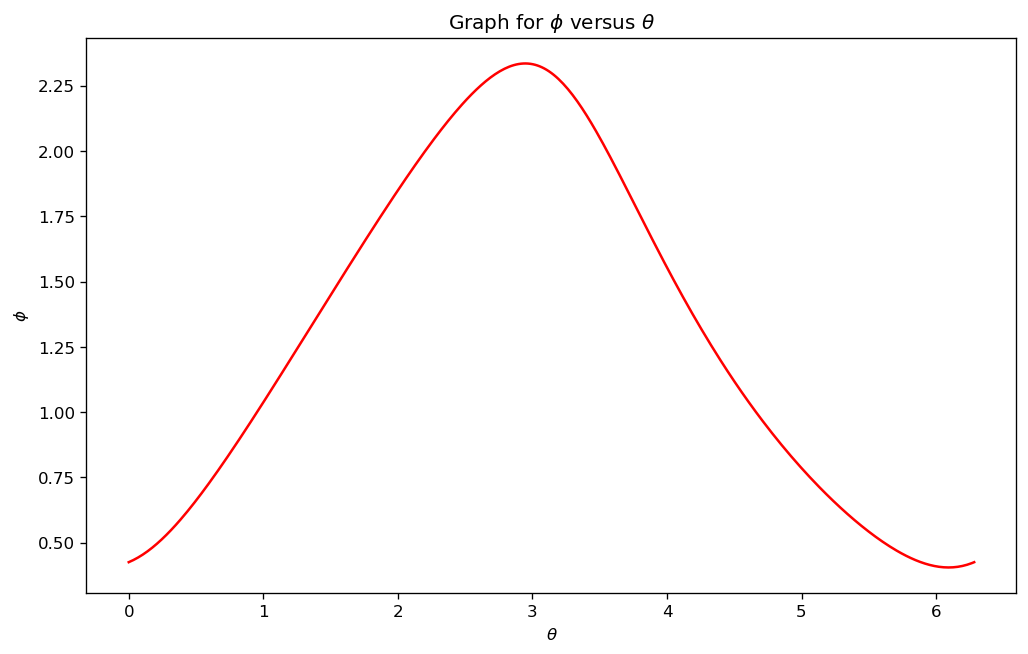

In [61]:
import sympy as sp
import math
import matplotlib.pyplot as plt

x = sp.symbols('x')

def find_phi(theta, theta2_val):
    r1, r2, r3, r4 = 7.00, 2.36, 6.86, 1.94
    theta4 = math.pi + theta
    tol = 1e-10
    max_iterations = 100
    
    f = (r1**2 + r2**2 + r4**2 - r3**2) + 2*(r2*r4*sp.sin(x)*sp.sin(theta4) + r2*r4*sp.cos(x)*sp.cos(theta4) - r1*r2*sp.cos(x) - r1*r4*sp.cos(theta4))
    fd = 2*(r2*r4*sp.cos(x)*sp.sin(theta4) - r2*r4*sp.sin(x)*sp.cos(theta4) + r1*r2*sp.sin(x))

    iter = 0
    p = [theta2_val]
    while iter < max_iterations:
        p_new = p[iter] - (f.subs(x,p[iter])/fd.subs(x,p[iter]))
        p_new = sp.N(p_new)
        p.append(p_new)
        if abs((p[iter+1]-p[iter])/p[iter+1])<=tol:
            iter = iter+1
            break
        iter = iter+1
    return p[-1]

theta = []
phi = []
theta2_val = sp.rad(30)
for i in range(361):
    theta.append(sp.rad(i))
    theta2_val = find_phi(theta[i], theta2_val)
    phi.append(theta2_val)

plt.figure(figsize=(10, 6), dpi=120)
plt.plot(theta, phi,'r', label = r"$\phi$")
plt.title(r"Graph for $\phi$ versus $\theta$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\phi$")
plt.savefig('phi.png')
plt.show()

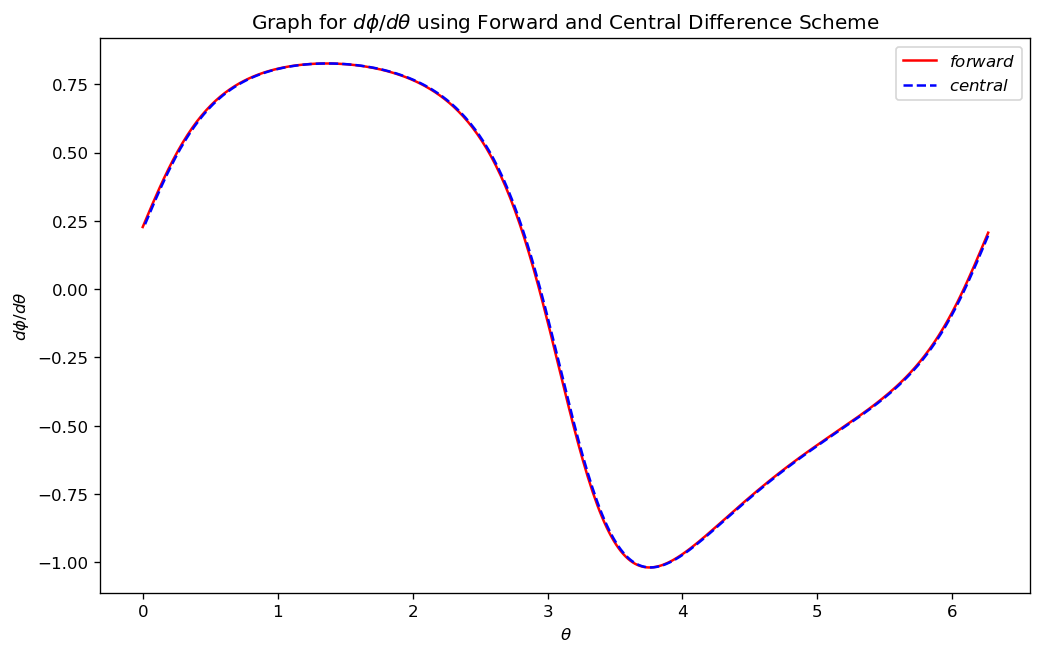

In [65]:
def forward(phi, theta):
    diff = []
    for i in range(len(phi)-1):
        diff.append((phi[i+1] - phi[i])/(theta[i+1] - theta[i]))
    return diff

def central(phi, theta):
    diff = []
    for i in range(1, len(phi)-1):
        diff.append((phi[i+1] - phi[i-1])/(theta[i+1] - theta[i-1]))
    return diff

forward_derivative = forward(phi, theta)
central_derivative = central(phi, theta)

plt.figure(figsize=(10, 6), dpi=120)
plt.plot(theta[:len(theta)-1], forward_derivative, 'r', label = r"$forward$")
plt.plot(theta[1:len(theta)-1], central_derivative,'b--', label = r"$central$")
plt.legend()
plt.title(r"Graph for $d\phi / d\theta$ using Forward and Central Difference Scheme")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$d\phi / d\theta$")
plt.savefig('diff1.png')
plt.show()

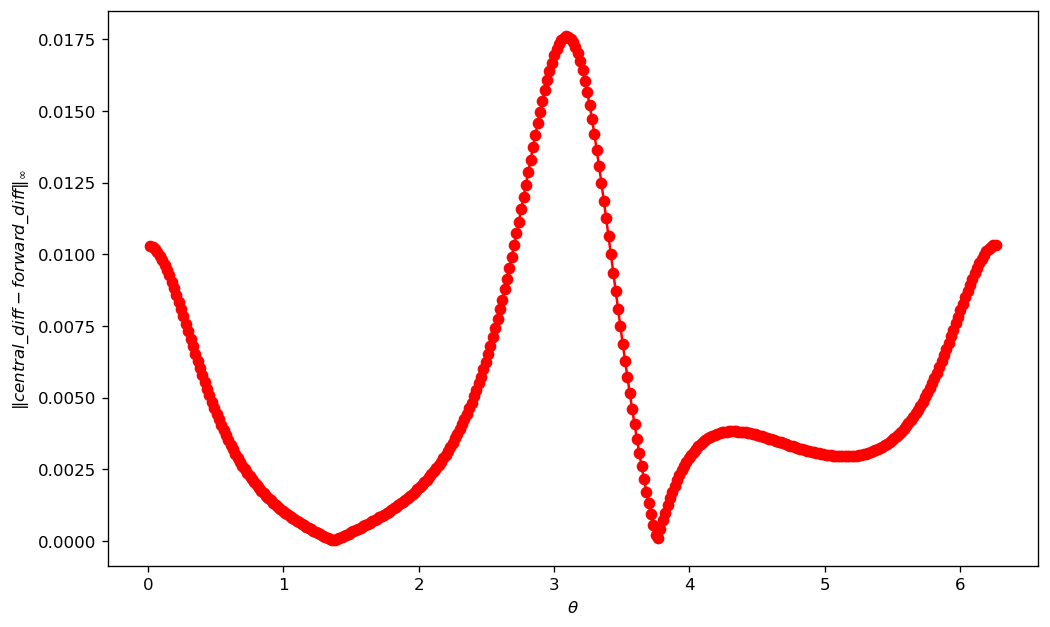

In [69]:
error = []
for i in range(len(central_derivative)):
    error.append(abs(central_derivative[i] - forward_derivative[i+1]))
plt.figure(figsize=(10, 6), dpi=120)
plt.plot(theta[1:len(theta)-1], error,'ro-')
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\|central\_diff - forward\_diff\|_\infty$")
plt.savefig('abserr1.png')
plt.show()

## Ques 2

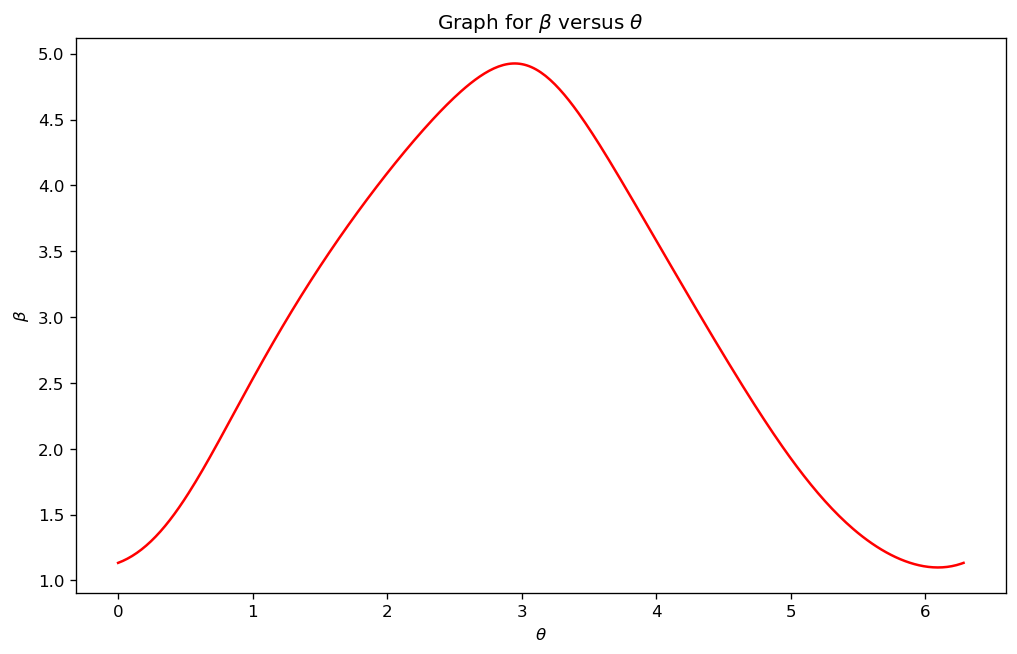

In [49]:
x = sp.symbols('x')

def find_betax(alpha, theta2_val):
    r1, r2, r3, r4 = 1.25, 1.26, 1.87, 2.39
    theta4 = math.pi + alpha
    tol = 1e-10
    max_iterations = 100
    
    f1 = (r1**2 + r2**2 + r4**2 - r3**2) + 2*(r2*r4*sp.sin(x)*sp.sin(theta4) + r2*r4*sp.cos(x)*sp.cos(theta4) - r1*r2*sp.cos(x) - r1*r4*sp.cos(theta4))
    f1p = 2*(r2*r4*sp.cos(x)*sp.sin(theta4) - r2*r4*sp.sin(x)*sp.cos(theta4) + r1*r2*sp.sin(x))

    iter = 0
    p = [theta2_val]
    while iter < max_iterations:
        p_new = p[iter] - (f1.subs(x,p[iter])/f1p.subs(x,p[iter]))
        p_new = sp.N(p_new)
        p.append(p_new)
        if abs((p[iter+1]-p[iter])/p[iter+1])<=tol:
            iter = iter+1
            break
        iter = iter+1
    return p[-1]

alpha = phi
for i in range(len(phi)):
    alpha[i] = phi[i] + sp.rad(149)

beta = []
theta2_val = sp.rad(30)
for i in range(len(alpha)):
    theta2_val = find_betax(alpha[i], theta2_val)
    beta.append(theta2_val)

plt.figure(figsize=(10, 6), dpi=120)
plt.plot(theta, beta,'r', label = r"$\beta$")
plt.title(r"Graph for $\beta$ versus $\theta$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\beta$")
plt.savefig('beta.png')
plt.show()


Forward difference scheme (1st derivative):  10.599979527512152
Central difference scheme (1st derivative):  10.632997083521774

Forward difference scheme (2nd derivative):  -28.126555797477938
Central difference scheme (2nd derivative):  -28.37649913782144 



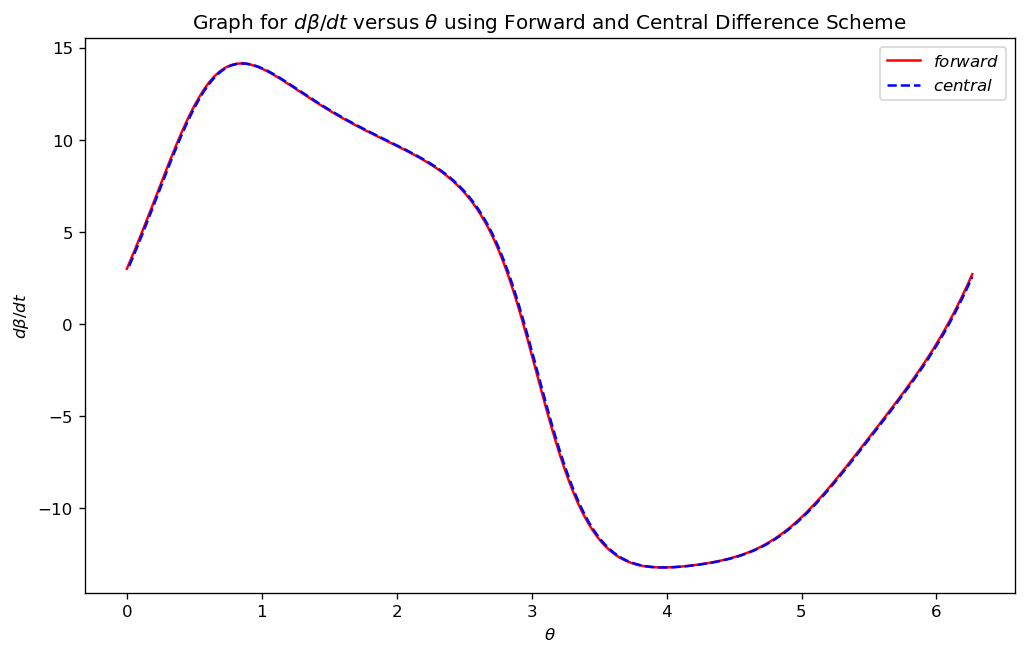

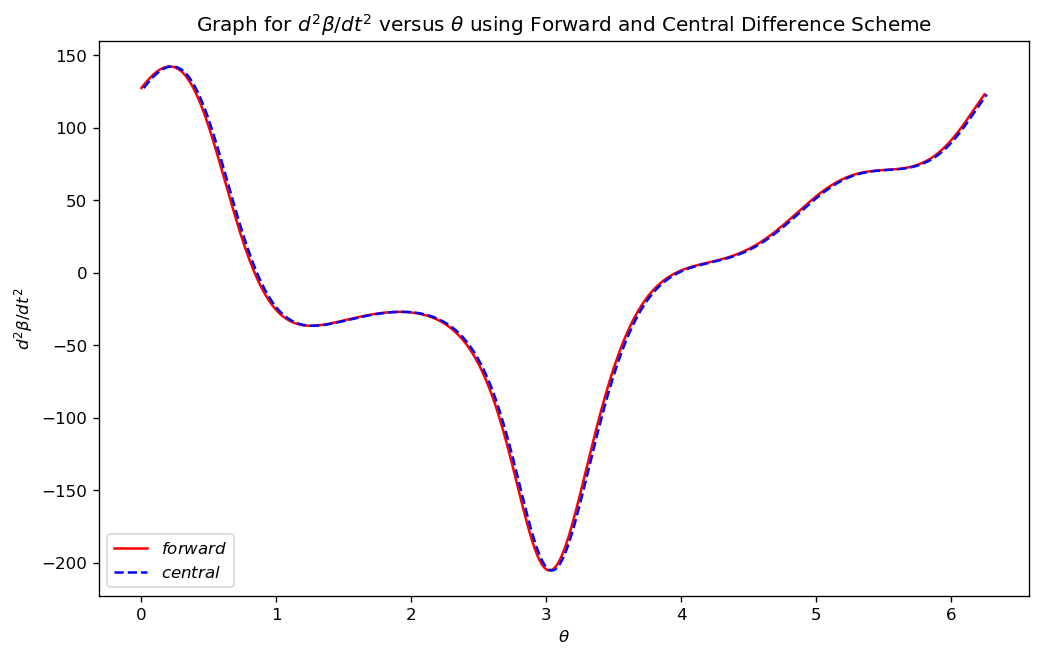

In [59]:
forward_deri = forward(beta, theta)
central_deri = central(beta, theta)

forward_der = forward_deri
central_der = central_deri
for i in range(len(forward_deri)):
    forward_der[i] = 7.5*forward_deri[i]
for i in range(len(central_der)):
    central_der[i] = 7.5*central_deri[i]

# Specific for equispaced grids
def forwardDouble(beta, theta):
    diff = []
    for i in range(len(beta)-2):
        diff.append((beta[i+2] - 2*beta[i+1] + beta[i])/((theta[i+1] - theta[i])**2))
    return diff

# Specific for equispaced grids
def centralDouble(beta, theta):
    diff = []
    for i in range(1, len(beta)-1):
        diff.append((beta[i+1] - 2*beta[i] + beta[i-1])/((theta[i+1] - theta[i])**2))
    return diff

forward_dderi = forwardDouble(beta, theta)
central_dderi = centralDouble(beta, theta)

forward_dder = forward_dderi
central_dder = central_dderi
for i in range(len(forward_dderi)):
    forward_dder[i] = (7.5**2)*forward_dderi[i]
for i in range(len(central_dderi)):
    central_dder[i] = (7.5**2)*central_dderi[i]

print("\nForward difference scheme (1st derivative): ", float(forward_der[100]))
print("Central difference scheme (1st derivative): ", float(central_der[99]))
print("\nForward difference scheme (2nd derivative): ", float(forward_dder[100]))
print("Central difference scheme (2nd derivative): ", float(central_dder[99]), "\n")

plt.figure(figsize=(10, 6), dpi=120)
plt.plot(theta[:len(theta)-1], forward_deri, 'r', label = r"$forward$")
plt.plot(theta[1:len(theta)-1], central_deri,'b--', label = r"$central$")
plt.legend()
plt.title(r"Graph for $d\beta / dt$ versus $\theta$ using Forward and Central Difference Scheme")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$d\beta / dt$")
plt.savefig('diff2.png')
plt.show()

plt.figure(figsize=(10, 6), dpi=120)
plt.plot(theta[:len(theta)-2], forward_dderi, 'r', label = r"$forward$")
plt.plot(theta[1:len(theta)-1], central_dderi,'b--', label = r"$central$")
plt.legend()
plt.title(r"Graph for $d^2\beta / dt^2$ versus $\theta$ using Forward and Central Difference Scheme")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$d^2\beta / dt^2$")
plt.savefig('ddiff2.png')
plt.show()